In [1]:
# First need to import dataset from Github
# Import needed libraries to get data from URL and load into Pandas DF
import os
import tarfile
import urllib
import pandas as pd

"""
# Define url and OS path that I want to save csv data under
DATA_URL = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/heart-train.csv"
DATA_URL_TEST = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/heart-test.csv"
DATA_PATH = os.path.join("/Users/Do-While/Desktop/SJSU/Classes/SJSU/Fall 2020", "DataSets")

# Function to get data from URL and return it as Pandas dataframe
def fetch_and_load_from_url(data_url, data_path, txt_file_name):
    
    # If no data path exists, create directory
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    # create text document path under OS path
    txt_path = os.path.join(data_path, txt_file_name)
    # Using URL, request data and return to created path
    urllib.request.urlretrieve(data_url, txt_path)
    # Read in text file, convert csv to pandas df and return upon close of file
    with open(txt_path, "r") as file:
        return pd.read_csv(file)

# Creating 2 separate dataframes
heart_train_df = fetch_and_load_from_url(DATA_URL, DATA_PATH, "heart_train.txt")
heart_test_df = fetch_and_load_from_url(DATA_URL_TEST, DATA_PATH, "heart_test.txt")
"""

In [5]:
# Define url and OS path that I want to save csv data under
DATA_URL_WHOLE = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/heart-complete.csv"
DATA_PATH = os.path.join("/Users/Do-While/Desktop/SJSU/Classes/SJSU/Fall 2020", "DataSets")

# Function to get data from URL and return it as Pandas dataframe
def fetch_and_load_from_url(data_url, data_path, txt_file_name):
    
    # If no data path exists, create directory
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    # create text document path under OS path
    txt_path = os.path.join(data_path, txt_file_name)
    # Using URL, request data and return to created path
    urllib.request.urlretrieve(data_url, txt_path)
    # Read in text file, convert csv to pandas df and return upon close of file
    with open(txt_path, "r") as file:
        return pd.read_csv(file)

# Creating dataframe
heart_complete_df = fetch_and_load_from_url(DATA_URL_WHOLE, DATA_PATH, "heart_complete.txt")

### A. Apply feature transformation on the features used in Task 1

In [6]:
# Using train_test_split function from sklearn to split the data
from sklearn.model_selection import train_test_split

# Divide data into X and Y
x_data = heart_complete_df.iloc[:,0:9]
y_data = heart_complete_df.iloc[:,9]

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=66)

In [30]:
# importing needed library to perform poly transformation
from sklearn.preprocessing import PolynomialFeatures



# import logistic regression library and preprocessing to get data into needed format for regression model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

# Need to do column preprocessing so that can use model
# Converting column to String so that can perform label encoding
x_train["famhist"] = x_train["famhist"].astype(str)
x_test["famhist"] = x_test["famhist"].astype(str)

# Doing label encoding so that model can have its float values

# Creating label encoding object
label_encoder = preprocessing.LabelEncoder()

# Selecting column to be transformed
famhist_data = x_train["famhist"]
famhist_test_data = x_test["famhist"]

# Fitting and transforming string values to unique ints based on their current value
famhist_trans = label_encoder.fit_transform(famhist_data)
famhist_test_trans = label_encoder.fit_transform(famhist_test_data)

# Adding transformed array in place of original data
x_train["famhist"] = famhist_trans
x_test["famhist"] = famhist_test_trans


# Adding polynomial of 2
poly_2 = PolynomialFeatures(2)

x_train_2 = poly_2.fit_transform(x_train)
x_test_2 = poly_2.transform(x_test)




# Creating logistic regression object with maximum number of iterations set to 1000 so that model can complete its training
logistic_2 = LogisticRegression(max_iter=10000)

logistic_2.fit(x_train_2, y_train)

y_predict = logistic_2.predict(x_test_2)

<ipython-input-30-d0671fb8112e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["famhist"] = x_train["famhist"].astype(str)
<ipython-input-30-d0671fb8112e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["famhist"] = x_test["famhist"].astype(str)
<ipython-input-30-d0671fb8112e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

Precision of Task 2: 0.605
Recall of Task 2: 0.473
F1 Score of Task 2: 0.531
Accuracy of Task 2: 0.669


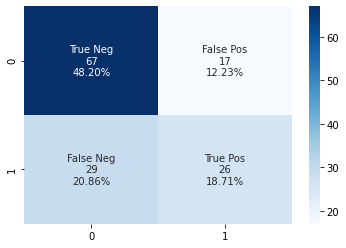

In [31]:
# Computing the confusion matrix for Part 2 result
# importing sklearn library for confusion matrix function
from sklearn.metrics import confusion_matrix
# Using seaborn for visualization
import seaborn as sns
import numpy as np
# Creating confusion matrix with test values and predicted Y values
cf_matrix_2 = confusion_matrix(y_test, y_predict)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_2.flatten()/np.sum(cf_matrix_2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix_2, annot=labels, fmt='', cmap="Blues")

# Computing the Precision, Recall and F1 Score from matrix and accuracy
precision = cf_matrix_2[1,1] / sum(cf_matrix_2[:,1])
recall = cf_matrix_2[1,1] / sum(cf_matrix_2[1,:])
f1_score = 2*precision*recall / (precision + recall)
accuracy  = np.trace(cf_matrix_2) / float(np.sum(cf_matrix_2))
print("Precision of Poly 2: {:0.3f}".format(precision))
print("Recall of Poly 2: {:0.3f}".format(recall))
print("F1 Score of Poly 2: {:0.3f}".format(f1_score))
print("Accuracy of Poly 2: {:0.3f}".format(accuracy))


Precision of Task 2: 0.521
Recall of Task 2: 0.455
F1 Score of Task 2: 0.485
Accuracy of Task 2: 0.619


C:\Users\Do-While\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


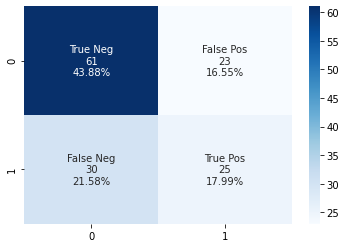

In [23]:
# Adding polynomial of 5
poly_5 = PolynomialFeatures(5)

x_train_5 = poly_5.fit_transform(x_train)
x_test_5 = poly_5.transform(x_test)




# Creating logistic regression object with maximum number of iterations set to 1000 so that model can complete its training
logistic_5 = LogisticRegression(max_iter=15000)

logistic_5.fit(x_train_5, y_train)

y_predict = logistic_5.predict(x_test_5)



# Creating confusion matrix with test values and predicted Y values
cf_matrix_5 = confusion_matrix(y_test, y_predict)


group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_5.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_5.flatten()/np.sum(cf_matrix_5)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix_5, annot=labels, fmt='', cmap="Blues")

# Computing the Precision, Recall and F1 Score from matrix and accuracy
precision = cf_matrix_5[1,1] / sum(cf_matrix_5[:,1])
recall = cf_matrix_5[1,1] / sum(cf_matrix_5[1,:])
f1_score = 2*precision*recall / (precision + recall)
accuracy  = np.trace(cf_matrix_5) / float(np.sum(cf_matrix_5))
print("Precision of Poly 5: {:0.3f}".format(precision))
print("Recall of Poly 5: {:0.3f}".format(recall))
print("F1 Score of Poly 5: {:0.3f}".format(f1_score))
print("Accuracy of Poly 5: {:0.3f}".format(accuracy))

#### A. Does varying the polynomial degree change your accuracy?
- Polynomial degree changes have lower overall accuracy than that of the base logistic regression model with no polynomial transformations. A degree change of 2 produces a better result than that of 5 but still less than the base model

#### Trying Standard Scaler to data

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

# Creating logistic regression object with maximum number of iterations set to 1000 so that model can complete its training
logistic_scaler = LogisticRegression(max_iter=1000)

logistic_scaler.fit(x_train_scale, y_train)

y_predict = logistic_scaler.predict(x_test_scale)

Precision of Task 2: 0.675
Recall of Task 2: 0.491
F1 Score of Task 2: 0.568
Accuracy of Task 2: 0.705


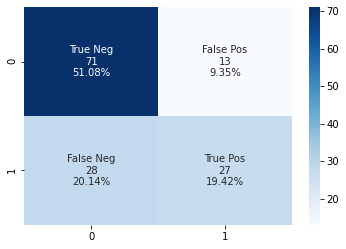

In [29]:
# Creating confusion matrix with test values and predicted Y values
cf_matrix_scale = confusion_matrix(y_test, y_predict)


group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_scale.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_scale.flatten()/np.sum(cf_matrix_scale)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix_scale, annot=labels, fmt='', cmap="Blues")

# Computing the Precision, Recall and F1 Score from matrix and accuracy
precision = cf_matrix_scale[1,1] / sum(cf_matrix_scale[:,1])
recall = cf_matrix_scale[1,1] / sum(cf_matrix_scale[1,:])
f1_score = 2*precision*recall / (precision + recall)
accuracy  = np.trace(cf_matrix_scale) / float(np.sum(cf_matrix_scale))
print("Precision of Scaled: {:0.3f}".format(precision))
print("Recall of Scaled: {:0.3f}".format(recall))
print("F1 Score of Scaled: {:0.3f}".format(f1_score))
print("Accuracy of Scaled: {:0.3f}".format(accuracy))

#### Observation: Standard Scaler
- Standard Scaler performed the same as the normal dataset in Part 2

### B. Identify if model is underfitting or overfitting - Use a damn Learning Curve

In [32]:
# Will be using polynomial features degree 2 for determining overfitting or underfitting
from sklearn.model_selection import cross_val_score
# Getting cross validation scores
scores = cross_val_score(logistic_2, x_train, y_train, cv=5)
scores

array([0.70769231, 0.75384615, 0.73846154, 0.765625  , 0.796875  ])

C:\Users\Do-While\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ValueError: X has 55 features per sample; expecting 1596

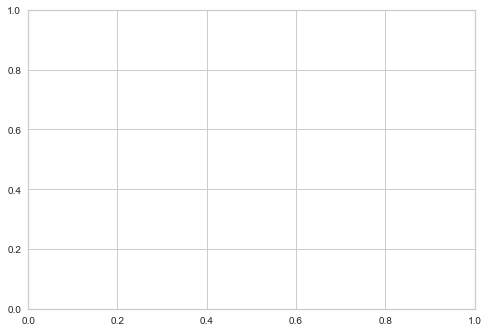

In [61]:
x_test_2

array([[1.0000000e+00, 1.4800000e+02, 0.0000000e+00, ..., 1.0745284e+03,
        8.8506000e+02, 7.2900000e+02],
       [1.0000000e+00, 1.0100000e+02, 4.8000000e-01, ..., 2.6936100e+01,
        8.3040000e+01, 2.5600000e+02],
       [1.0000000e+00, 1.2400000e+02, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.5600000e+02],
       ...,
       [1.0000000e+00, 1.3800000e+02, 5.0000000e-02, ..., 0.0000000e+00,
        0.0000000e+00, 3.2400000e+02],
       [1.0000000e+00, 1.1800000e+02, 2.8000000e-01, ..., 0.0000000e+00,
        0.0000000e+00, 1.6810000e+03],
       [1.0000000e+00, 1.3200000e+02, 0.0000000e+00, ..., 1.0634121e+03,
        1.0761300e+03, 1.0890000e+03]])